In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json

# Question - 1 - Write a short detail analysis of how the rating is affected by restaurant due following features: Plot a suitable graph to explain your inference.

In [8]:
file_data = pd.read_csv('Datasets/zomato.csv',encoding='iso-8859-1')
file_data = file_data[file_data['Country Code']==1]

# Number of Votes given Restaurant

<Figure size 432x288 with 0 Axes>

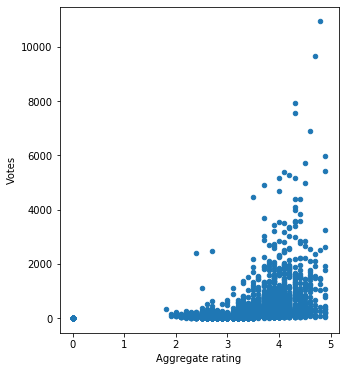

In [56]:
df = file_data.copy()
df = df[['Aggregate rating','Votes']]
df = df.sort_values('Votes',ascending=False)
plt.savefig('fig1.png',orientation='portrait',dpi=100,bbox_inches='tight')
fig = df.plot(x='Aggregate rating',y='Votes',kind='scatter',figsize=(5,6)).get_figure()
fig.savefig('fig1.png',orientation='portrait',dpi=100,bbox_inches='tight')

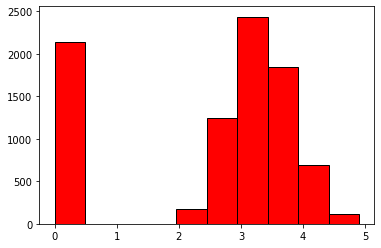

In [59]:
df = file_data.copy()
df = df[['Aggregate rating','Votes']]
var = np.array(df['Aggregate rating'])
#df = df.sort_values('Votes',ascending=False)
plt.hist(var,edgecolor='black',color='red')
plt.savefig('fig1.png',orientation='portrait',dpi=100,bbox_inches='tight')
plt.show()

### As we see above it is clear that the rating is max between 3-4

# Restaurant serving more number of cuisines.

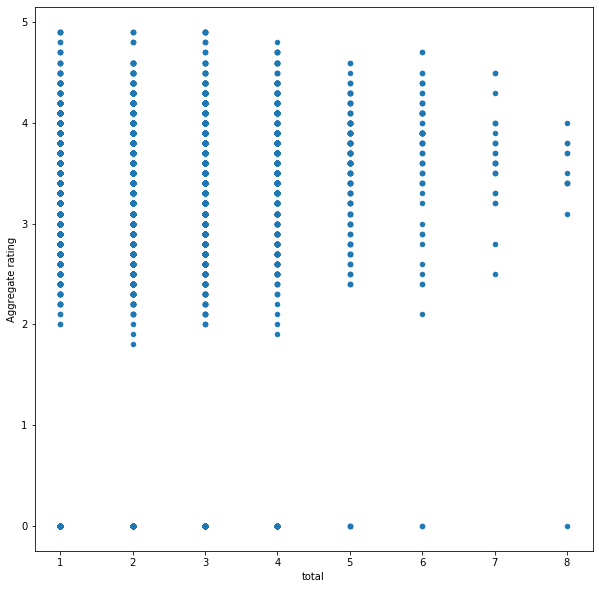

In [62]:
df = file_data.copy()
df['total'] = df.Cuisines.apply( lambda x: len(str(x).split(', ')) )
fig = df.plot(y='Aggregate rating',x='total',kind='scatter',figsize=(10,10)).get_figure()
fig.savefig('fig1.png',orientation='portrait',dpi=100,bbox_inches='tight')

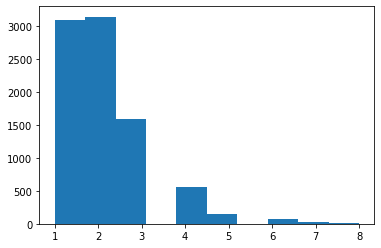

In [63]:
df = file_data.copy()
df['total'] = df.Cuisines.apply( lambda x: len(str(x).split(', ')) )
var = np.array(df.total)
plt.hist(var)
#plt.xticks()
plt.savefig('fig1.png',orientation='portrait',dpi=100,bbox_inches='tight')
plt.show()

## This histogram is for understanding the no. of cuisines are served relatively in a restaurant

# Average Cost of Restaurant

### From above graphs we can see our trends on the basis of restaurants serving diff. no. of cuisines and the rating of cuisines based on the no. of cuisines served in their cuisines.

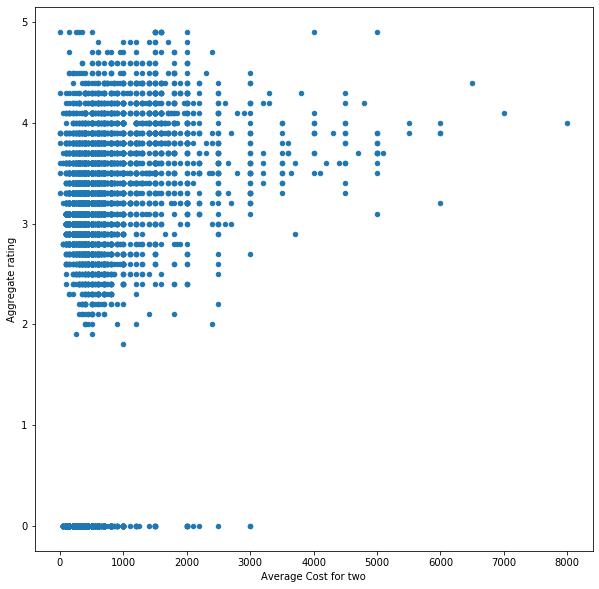

In [64]:
df = file_data.copy()
fig = df.plot(y='Aggregate rating',x='Average Cost for two',kind='scatter',figsize=(10,10)).get_figure()
fig.savefig('fig1.png',orientation='portrait',dpi=100,bbox_inches='tight')

# Restaurant serving some specific cuisines.

In [175]:
df = file_data.copy()
df['Cuisines'] = df['Cuisines'].apply(lambda x: str(x).split(', '))
for i in range(len(df)):
    for x in df.iloc[i].Cuisines:
        new_data.append([x,df.iloc[i]['Aggregate rating']])
d = pd.DataFrame(new_data,columns = ['Cuisine','Rating'])

In [235]:
ans = d.groupby('Cuisine')['Rating'].agg(('count','mean')).reset_index()

In [239]:
ans = ans.sort_values(['mean'],ascending=False)
ans[:10]

,Cuisine,count,mean
69,Persian,6,4.600000
33,German,12,4.350000
59,Modern Indian,96,4.281250
21,Charcoal Grill,24,4.175000
68,Parsi,48,4.100000
42,Iranian,18,4.066667
18,Burmese,60,4.050000
81,Steak,12,4.050000
79,Spanish,42,4.028571
41,Indonesian,36,4.000000


In [242]:
ans = ans.sort_values('count',ascending=False)
ans[:10]

,Cuisine,count,mean
65,North Indian,23676,2.505170
23,Chinese,16140,2.598885
30,Fast Food,11778,2.549720
61,Mughlai,5952,2.605444
10,Bakery,4356,2.397107
24,Continental,4344,3.507873
43,Italian,4092,3.500587
78,South Indian,3786,2.458954
19,Cafe,3762,3.232057
27,Desserts,3582,2.858794


### From above 2 cells we can see that all foreign cuisines have better ratings but they are low in number while all indian cuisines have more count but have avg. ratings

# Question - 2 - Find the weighted restaurant rating of each locality and find out the top 10 localities with more weighted restaurant rating?


# Weighted Restaurant Rating=Σ (number of votes * rating) / Σ (number of votes) .

In [66]:
df = file_data.copy()
df['V*R'] = df.Votes * df['Aggregate rating']
df = df.groupby('Locality').sum()
df = df[['Votes','V*R']]


In [67]:
df['ans'] = df['V*R']/df['Votes']
df = df.sort_values('ans',ascending=False)
df[:10]

,Votes,V*R,ans
Locality,,,
"Hotel Clarks Amer, Malviya Nagar",322,1577.8,4.900000
Aminabad,1057,5179.3,4.900000
Friends Colony,1949,9524.6,4.886916
Powai,3425,16583.4,4.841869
Kirlampudi Layout,372,1793.1,4.820161
Deccan Gymkhana,2510,12048.0,4.800000
"Express Avenue Mall, Royapettah",1262,6057.6,4.800000
Banjara Hills,2132,10060.4,4.718762
"Sector 5, Salt Lake",7006,32977.4,4.707023


In [272]:
for i in range(10):
    print(df.index[i],df.values[i][2])

Hotel Clarks Amer, Malviya Nagar 4.9
Aminabad 4.9
Friends Colony 4.886916367367881
Powai 4.841868613138686
Kirlampudi Layout 4.820161290322581
Deccan Gymkhana 4.8
Express Avenue Mall,  Royapettah 4.8
Banjara Hills 4.7187617260787995
Sector 5, Salt Lake 4.707022552098202
Riverside Mall, Gomti Nagar 4.7
